###PRELIMINARIES STEPS

In [ ]:
pip install z3-solver

In [ ]:
pip install utils

In [ ]:
from z3 import *
from utils import *
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from random import random
%matplotlib inline

In [ ]:
txtfiles = []
for file in glob.glob("*.txt"):
    txtfiles.append(file)
print(txtfiles)

['ins-16.txt', 'ins-11.txt', 'ins-21.txt', 'ins-19.txt', 'ins-22.txt', 'ins-20.txt']


In [ ]:
w=0
n_circuits=0
circuits=[]

with open(str(txtfiles[29]),'r') as f:
    lines= f.readlines()
    w=int(lines[0])
    n_circuits=int(lines[1])
    lines_2=[]
    for x in lines[2:]:
      newel=x.strip("\n").split(" ")
      lines_2.append(newel)
    for i in range(len(lines_2)):
      circuits.append([int(lines_2[i][0]),int(lines_2[i][1])])

print("Maximum length: " +str(w) + "\nNumber of circuits: " +str(n_circuits)+ "\nDimension of circuits: "+str(circuits))

IndexError: ignored

### FUNCTIONS

In [ ]:
def display_solution(solution,w,n):
 ## Output
  print(f'''{n}
{w} {solution[0]['length = ']}''')
  for j in range(1,n+1):
    print(f'''{solution[j]['x_dimension = ']} {solution[j]['y_dimension = ']} {solution[j]['x_position = ']} {solution[j]['y_position = ']}''')

  boxes = []
  for i in range(1,n+1):
    circ = []
    for el in solution[i].keys():
      circ.append(solution[i][el])
    boxes.append(circ)

  fig1 = plt.figure()
  ax1 = fig1.add_subplot(111, aspect='equal')

  for i,box in enumerate(boxes):
    position = (box[2],box[3])
    heigh = box[1]
    width = box[0]
    ax1.add_patch(
      patches.Rectangle(position, width, heigh, 
                        color = (random(),random(),random())))
  
  plt.ylim((0,solution[0]['length = ']));
  plt.xlim((0,w));



In [ ]:
def lex_less(vars_1,vars_2):
  n = len(vars_1)
  sol = [vars_1[0] <= vars_2[0]]

  for j in range(1,n): #equations
    el = 1
    eq = [vars_1[0] == vars_2[0]]
    while el < j: # var in equations
      temp = vars_1[el] == vars_2[el]
      el += 1
      eq.append(temp)

    eq = Implies(And(eq),vars_1[j]<=vars_2[j])
    sol.append(eq)

  return And(sol)

def lim_length(vars):
    max = vars[0]
    for el in vars[1:]:
        max = If(el > max, el, max)
    return max
    


### PROBLEM SPECIFICATION

In [ ]:
def problem(lim,istance):
    #variables
    pos=[]
    for i, ist in enumerate(istance):
        pos.append([])
        for j, _ in enumerate(ist):
            pos[i].append(Int(f"p{i}_{j}"))

    # Solver
    opt = Optimize()
    opt.set("timeout", 300000) # time limit = 5 min

    #Position >=0
    for ist in pos:
        for position in ist:
            opt.add(position >= 0)
    
    #X_position <= w
    for i, ist in enumerate(pos):
        opt.add(ist[0]+istance[i][0]<=lim)

    #No overlap
    for i in range(len(pos)):
        for j in range(len(pos)):
            if i!=j:
                opt.add(Or(Or(pos[i][0]+istance[i][0]<=pos[j][0],pos[j][0]
                +istance[j][0]<=pos[i][0]),
                Or(pos[i][1]+istance[i][1]<=pos[j][1],pos[j][1]+istance[j][1]
                <=pos[i][1])))

    # lexicographic constr symmetry breaking
    x_pos = [p[0] for p in pos ]
    y_pos = [p[1] for p in pos ]
    x_pos_symmetry = [lim - el[0] - p[0] for el, p in zip(istance, pos)]
    y_pos_symmetry = [lim - el[1] - p[1] for el, p in zip(istance, pos)]

    opt.add(lex_less(x_pos,x_pos_symmetry))
    opt.add(lex_less(y_pos,y_pos_symmetry))
    

    #Objective
    limit = [dim[-1] + ist[-1] for ist, dim in zip(istance, pos)]
    makespan = Int('makespan')
    opt.add(makespan <= sum([ist[-1] for ist in istance]))
    objective = makespan == lim_length(limit)
    opt.add(objective)
    opt.minimize(makespan)

    opt.check()
    m = opt.model()
    sol=[]
    length = int(m.evaluate(makespan).as_string())
    sol.append({"length = " : length})
    for i in range(len(istance)):
      x_position= int(m.evaluate(pos[i][0]).as_string())
      y_position= int(m.evaluate(pos[i][1]).as_string())
      sol.append({
            "x_dimension = " : istance[i][0],
            "y_dimension = " : istance[i][1],
            "x_position = " : x_position,
            "y_position = " : y_position,
        })

    return sol

In [ ]:
 display_solution(problem(w,circuits),w,n_circuits)

### INSTANCE RESOLUTION


Maximum length: 23
Number of circuits: 19
Dimension of circuits: [[3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 14], [3, 20], [4, 3], [4, 4], [4, 6], [4, 10], [4, 11], [4, 12], [6, 3]]

19
23 29
3 3 9 3
3 4 9 10
3 5 4 22
3 6 8 14
3 7 19 2
3 8 7 20
3 9 3 1
3 10 0 0
3 11 12 15
3 12 16 2
3 14 6 0
3 20 19 9
4 3 11 26
4 4 1 10
4 6 4 14
4 10 12 5
4 11 0 14
4 12 15 15
6 3 10 0
-------------------------------------------------------------------------------------------------------

Maximum length: 18
Number of circuits: 16
Dimension of circuits: [[3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 10], [3, 11], [4, 3], [4, 4], [4, 5], [4, 6], [5, 3], [5, 4], [5, 5], [5, 6]]

16
18 19
3 3 4 7
3 4 8 15
3 5 4 2
3 6 12 0
3 7 15 2
3 8 12 7
3 10 15 9
3 11 0 8
4 3 0 0
4 4 11 15
4 5 0 3
4 6 8 9
5 3 7 6
5 4 3 10
5 5 3 14
5 6 7 0
-------------------------------------------------------------------------------------------------------

Maximum length: 28
Number of ci

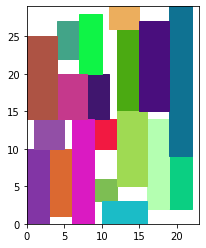

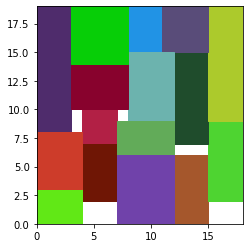

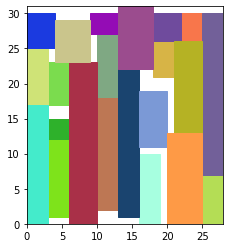

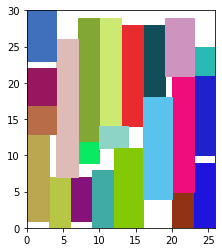

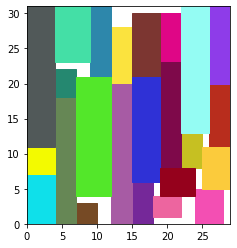

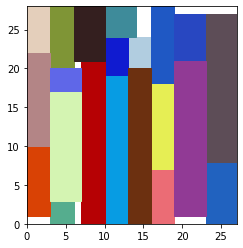

In [ ]:
# for i in range(len(txtfiles)):
#   w=0
#   n_circuits=0
#   circuits=[]

#   with open(str(txtfiles[i]),'r') as f:
#       lines= f.readlines()
#       w=int(lines[0])
#       n_circuits=int(lines[1])
#       lines_2=[]
#       for x in lines[2:]:
#         newel=x.strip("\n").split(" ")
#         lines_2.append(newel)
#       for i in range(len(lines_2)):
#         circuits.append([int(lines_2[i][0]),int(lines_2[i][1])])
#   #print("Doing: " +str(txtfiles[i])+ "\n")

#   print("Maximum length: " +str(w) + "\nNumber of circuits: " +str(n_circuits)+ "\nDimension of circuits: "+str(circuits)+ "\n")
#   display_solution(problem(w,circuits),w,n_circuits)
#   print("-------------------------------------------------------------------------------------------------------\n")

In [ ]:
 print("Doing: " +str(txtfiles[29])+ "\n")

print("Maximum length: " +str(w) + "\nNumber of circuits: " +str(n_circuits)+ "\nDimension of circuits: "+str(circuits)+ "\n")
display_solution(problem(w,circuits),w,n_circuits)
print("-------------------------------------------------------------------------------------------------------\n")